# Preparation

Peparation biasa dilakukan untuk mempersiapkan data sebelum masuk dalam tahap pemodelan. <br>
Berikut adalah tahapan yang akan dilalui pada data `MNIST` :
1. Loading MNIST Dataset
2. Visualizing Data
3. Designing the Neural Network Model
4. Setting Hyperparameters and Training Loop

## Loading MNIST Dataset

In [ ]:
import torch
import torchvision
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

# Load MNIST dataset
train_data = torchvision.datasets.MNIST(root='data', train=True, transform=ToTensor(), download=True)
test_data = torchvision.datasets.MNIST(root='data', train=False, transform=ToTensor(), download=True)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=128, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=128, shuffle=False)


100%|██████████| 9912422/9912422 [00:00<00:00, 19973102.83it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 76090259.94it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 43835831.07it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 15035934.31it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



## Visualizing Data

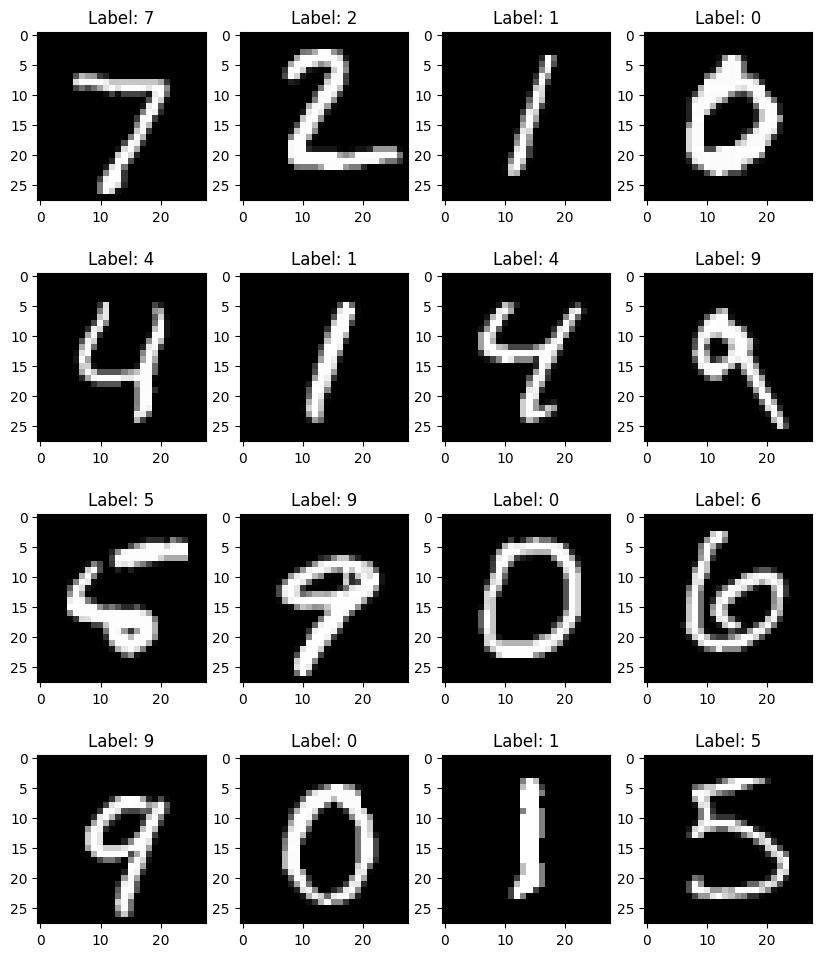

In [ ]:
# Visualize several MNIST datasets
fig, ax = plt.subplots(4, 4, figsize=(10, 12))
for i in range(16):
    image, label = test_data[i]
    row = i // 4
    col = i % 4
    ax[row][col].imshow(image.squeeze(), cmap='gray')
    ax[row][col].set_title(f'Label: {label}')
plt.show()

## Designing the Neural Network Model

In [ ]:
import torch.nn as nn

class DeepModel(nn.Module):
    def __init__(self):
        super(DeepModel, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 512)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(512, 256)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(256, 128)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        x = self.relu3(x)
        x = self.fc4(x)
        return x

# Create an instance of the model
model = DeepModel()


## Setting Hyperparameters and Training Loop

In [ ]:
import torch.optim as optim

# Define hyperparameters
learning_rate = 0.001
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
num_epochs = 15

# Training loop
for epoch in range(num_epochs):
    model.train()
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()


## Evaluating the Model and Calculating Performance Metrics

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, classification_report

# Evaluate the model
model.eval()
all_preds = []
all_labels = []

for images, labels in test_loader:
    outputs = model(images)
    _, preds = torch.max(outputs, 1)
    all_preds.extend(preds.cpu().numpy())
    all_labels.extend(labels.cpu().numpy())

# Calculate performance metrics
acc = accuracy_score(all_labels, all_preds)
cm = confusion_matrix(all_labels, all_preds)
f1 = f1_score(all_labels, all_preds, average='macro')
precision = precision_score(all_labels, all_preds, average='macro')
recall = recall_score(all_labels, all_preds, average='macro')
cr = classification_report(all_labels, all_preds)


## Show Results

In [ ]:
# Describe and explain the results
print(f'Accuracy: {acc:.4f}')
print(f'Confusion Matrix:\n {cm}')
print('\n')
print(f'Classification Report:\n {cr}')
print(f'F1 Score: {f1:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')


Accuracy: 0.9814
Confusion Matrix:
 [[ 971    1    1    1    0    0    4    1    1    0]
 [   0 1126    1    0    0    0    1    2    5    0]
 [   2    1 1010    2    2    0    0    5   10    0]
 [   2    0    4  987    0    3    0    6    6    2]
 [   0    0    4    0  961    0    4    2    0   11]
 [   2    0    0   12    2  862    6    1    6    1]
 [   2    2    0    1    3    2  945    0    3    0]
 [   2    1    6    0    0    0    0 1005    3   11]
 [   1    0    3    4    4    1    1    3  952    5]
 [   3    2    0    2    4    2    0    0    1  995]]


Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.97      0.98       892
           6       0.98     

## Display the confusion matrix

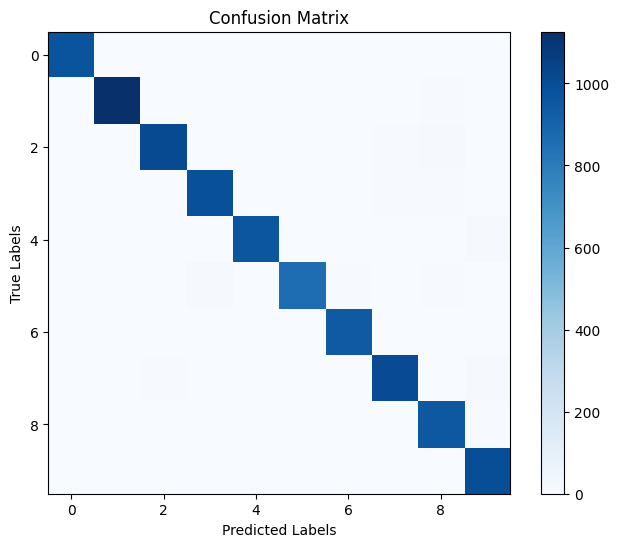

In [ ]:
# Display the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.colorbar()
plt.show()

# Describing and Explaining the Results

Hasil dari Task 3 berdasarkan evaluasi model deep learning untuk handwritten digit classification menggunakan dataset MNIST adalah sebagai berikut:

1. **Accuracy:** Model ini mencapai akurasi sebesar 98,14%. Metrik ini mengindikasikan tingkat kebenaran secara keseluruhan dari prediksi model. Dalam hal ini, artinya model berhasil mengklasifikasikan sekitar 98,14% angka tulisan tangan dengan benar dalam dataset uji.

2. **Confusion Matrix:** Matriks kebingungan adalah tabel yang memberikan rincian prediksi model. Ini menunjukkan jumlah prediksi benar positif, benar negatif, salah positif, dan salah negatif untuk setiap kelas (digit 0-9). Elemen diagonal mewakili prediksi yang benar, sementara elemen di luar diagonal mewakili kesalahan klasifikasi.

3. **Classification Report:**
   - **Precision:** Presisi mengukur kemampuan model untuk membuat prediksi positif yang akurat. Ini adalah rasio antara benar positif dengan jumlah benar positif dan salah positif. Presisi rata-rata tertimbang untuk semua kelas adalah 0,9814, menunjukkan presisi yang tinggi.
   - **Recall:** Recall, juga dikenal sebagai sensitivitas, mengukur kemampuan model untuk mengidentifikasi semua instansi yang relevan (benar positif) dengan benar. Ini adalah rasio antara benar positif dengan jumlah benar positif dan salah negatif. Recall rata-rata tertimbang untuk semua kelas adalah 0,9811, menunjukkan recall yang tinggi.
   - **F1-Score:** F1-Skor adalah nilai harmonik dari presisi dan recall. Ini memberikan keseimbangan antara presisi dan recall. F1-Skor rata-rata tertimbang untuk semua kelas adalah 0,9812, menunjukkan keseimbangan yang baik antara presisi dan recall.

**Penjelasan Keseluruhan:** <br>
> Model deep learning ini berhasil dengan sangat baik dalam dataset MNIST. Dengan akurasi sebesar 98,14%, model ini menunjukkan kemampuan tinggi dalam mengklasifikasikan angka tulisan tangan dengan benar. Matriks kebingungan menunjukkan bahwa kesalahan klasifikasi relatif rendah, dengan sebagian besar kesalahan terjadi antara digit yang mirip secara visual (misalnya, 4 dan 9). Presisi, recall, dan F1-Skor yang tinggi lebih lanjut mengkonfirmasi efektivitas model ini.

Secara keseluruhan, model deep learning ini berhasil belajar dan menggeneralisasi dari data, menghasilkan prediksi yang akurat untuk klasifikasi angka tulisan tangan. Model ini dapat dianggap sebagai model yang kuat dan dapat diandalkan untuk tugas ini.